<a href="https://colab.research.google.com/github/ssunwalka01/peopleinteractive/blob/master/Shubham_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a Classification Problem (Targeting to whether the customers bought a specific product or not).

- Loading the Libraries

In [585]:
# importing libraries
import pandas as pd # for data handling
import numpy as np # for mathematical calculations
import seaborn as sns # for data visualisations
import matplotlib.pyplot as plt # for plotting graphs
%matplotlib inline
import warnings # to ignore warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
import lightgbm as lgbm
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

- Reading the Dataset

In [586]:
# training data
data = pd.read_table('/content/Dataset.txt', sep = '\t')
data.to_csv("data_train.csv", index = False)
# test data
test_1 = pd.read_table('/content/Dataset_test.txt', sep = '\t')
test_1.to_csv("data_test.csv", index = False)

In [587]:
train = pd.read_csv("/content/data_train.csv")
test = pd.read_csv("/content/data_test.csv")

In [588]:
# Keeping the original copy of data for future 
train_original = train.copy()
test_copy = test.copy()

In [589]:
train.head()

,Index,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,C
0,1,0.224506,0.500340,0.489860,0.902413,7934,-6970,-5714,9982,-5697,4227810299,-3918676258,316195953,6176861823,-3433637453,10/4/1986,9/6/1992,2,1,706,305,1,2,0
1,2,0.321128,0.281119,0.907283,0.772159,-8238,1219,1663,1287,-3658,-1146724819,-6837090439,1378635942,-9031507610,609277486,2/24/1979,1/5/1983,1,1,423,206,18,7,1
2,3,0.893441,0.622005,0.998776,0.098386,8540,5266,-9377,-3504,-4511,5947184989,6881163164,-9921889287,-5610051842,-8977995005,1/12/1989,11/22/1986,2,1,703,315,1,4,0
3,4,0.320641,0.957234,0.346000,0.646479,-7772,-383,9681,-8661,3474,-5724795826,-6014104498,6550322883,-4697085930,4868760308,2/18/1982,6/10/1992,1,1,122,304,15,1,0
4,5,0.475961,0.623008,0.544988,0.159709,1571,-8039,-7961,-2385,4407,-3097637172,-9755731483,759031103,9984692447,9757408267,4/10/1987,10/19/1985,1,1,486,240,1,1,0


In [590]:
data_test.head()

,Index,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22
0,T30234341,0.654765,0.812009,0.603190,0.391039,-5220,4825,-1784,7447,-7147,-3461806391,8178108368,-8674321652,8074343777,5553595074,9/17/1996,8/18/1990,1,1,436,478,1,1
1,T30234342,0.694636,0.690568,0.473460,0.259760,-618,-5018,2012,9259,9267,-36253473,-6531193961,1849753082,-5556861821,2216284070,11/7/1985,4/11/1990,1,1,138,56,10,4
2,T30234343,0.203759,0.323301,0.492294,0.011448,-8778,6141,6965,3774,4303,5354243488,8053401796,782597920,-2121815725,-315409510,7/9/1984,5/4/1997,1,1,117,323,10,1
3,T30234344,0.319627,0.286247,0.906197,0.093840,-7929,4471,7715,9543,335,7405036171,-2666864618,-8649240595,1389754605,-3360224957,6/3/1987,7/1/1988,1,1,115,149,16,21
4,T30234345,0.236003,0.782784,0.285689,0.383585,-3296,4564,-1580,-8559,-27,-6351599280,-2152422738,4768902493,3653338555,7604838279,7/17/1984,12/3/1993,1,1,527,281,3,1


In [591]:
print("Shape of Train data", train.shape)

Shape of Train data (101180, 24)


We have 101180 rows and 24 columns in the training data.

In [592]:
# getting column names of variables
print("\n Columns of data \n", train.columns)


 Columns of data 
 Index(['Index', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10',
       'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20',
       'F21', 'F22', 'C'],
      dtype='object')


In [593]:
# getting data types of variables
print("\n Data Types of data\n", train.dtypes)


 Data Types of data
 Index      int64
F1       float64
F2       float64
F3       float64
F4       float64
F5         int64
F6         int64
F7         int64
F8         int64
F9         int64
F10        int64
F11        int64
F12        int64
F13        int64
F14        int64
F15       object
F16       object
F17        int64
F18        int64
F19        int64
F20        int64
F21        int64
F22        int64
C          int64
dtype: object


We have F15 and F16 as object data types which will be changed to datetime format for further feature engineering.

0    75.462542
1    24.537458
Name: C, dtype: float64


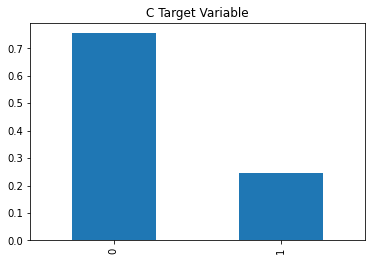

In [594]:
# TARGET VARIABLE
print(train['C'].value_counts(normalize=True)*100)   # percentage wise
train['C'].value_counts(normalize=True).plot.bar(title = "C Target Variable")

- There is a class imbalance case. Class '0' is in majority carrying 75% of the data.

**UNIVARIATE ANALYSIS**

- `Continuous Variables` : We use histograms or box plots for visualisation.

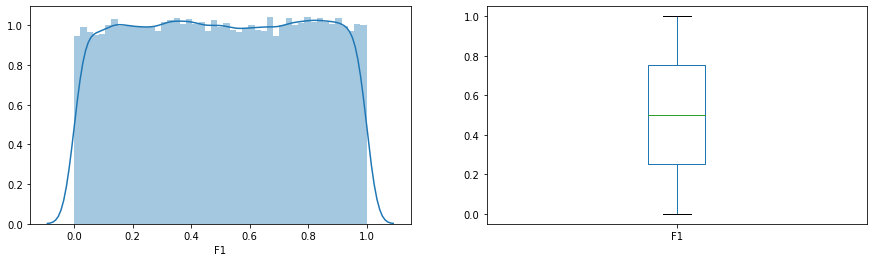

In [595]:
# distplot gives the histogram
plt.figure(1)
plt.subplot(121)
sns.distplot(train['F1']);
plt.subplot(122)
train['F1'].plot.box(figsize=(15,4)) 
plt.show()

 - Though the distribution is not normal but it is also not skewed either.
 - No outliers are present.

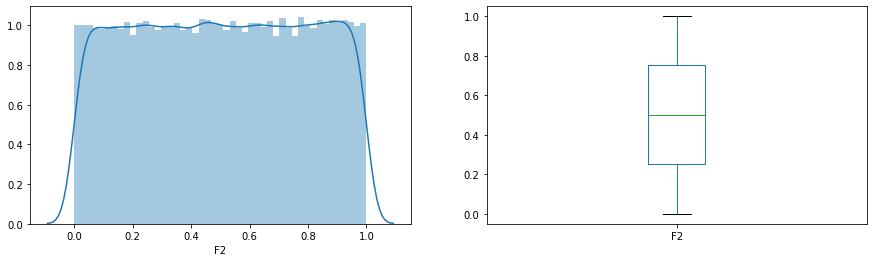

In [596]:
# distplot gives the histogram
plt.figure(1)
plt.subplot(121)
sns.distplot(train['F2']);
plt.subplot(122)
train['F2'].plot.box(figsize=(15,4)) 
plt.show()

 - Though the distribution is not normal but it is also not skewed either.
 - No outliers are present.

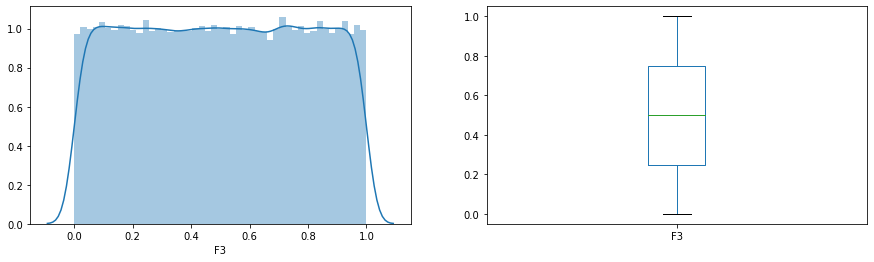

In [597]:
# distplot gives the histogram
plt.figure(1)
plt.subplot(121)
sns.distplot(train['F3']);
plt.subplot(122)
train['F3'].plot.box(figsize=(15,4)) 
plt.show()

 - Though the distribution is not normal but it is also not skewed either.
 - No outliers are present.

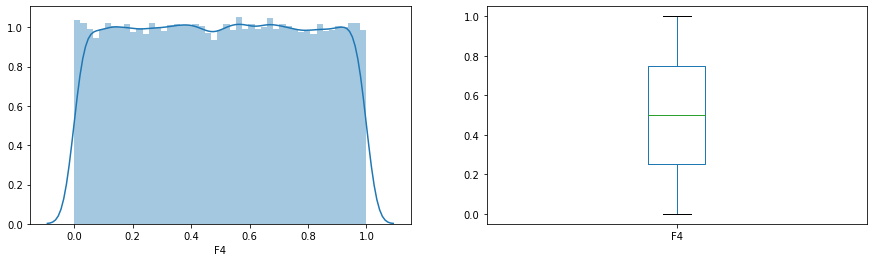

In [598]:
# distplot gives the histogram
plt.figure(1)
plt.subplot(121)
sns.distplot(train['F4']);
plt.subplot(122)
train['F4'].plot.box(figsize=(15,4)) 
plt.show()

 - Though the distribution is not normal but it is also not skewed either.
 - No outliers are present.

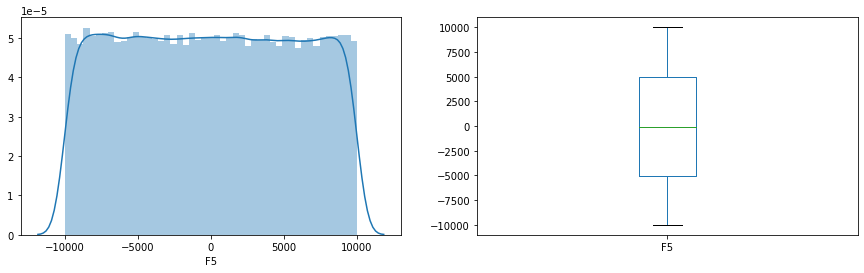

In [599]:
# distplot gives the histogram
plt.figure(1)
plt.subplot(121)
sns.distplot(train['F5']);
plt.subplot(122)
train['F5'].plot.box(figsize=(15,4)) 
plt.show()

 - Though the distribution is not normal but it is also not skewed either.
 - No outliers are present.

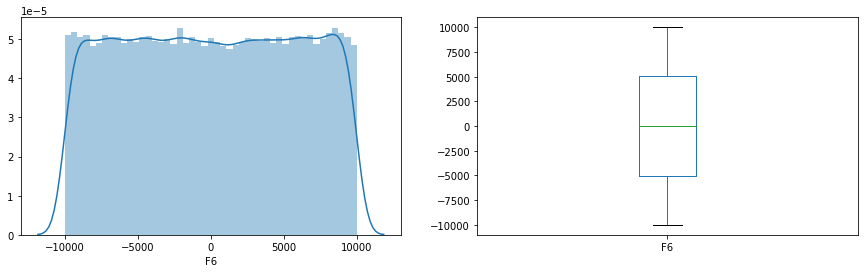

In [600]:
# distplot gives the histogram
plt.figure(1)
plt.subplot(121)
sns.distplot(train['F6']);
plt.subplot(122)
train['F6'].plot.box(figsize=(15,4)) 
plt.show()

 - Though the distribution is not normal but it is also not skewed either.
 - No outliers are present.

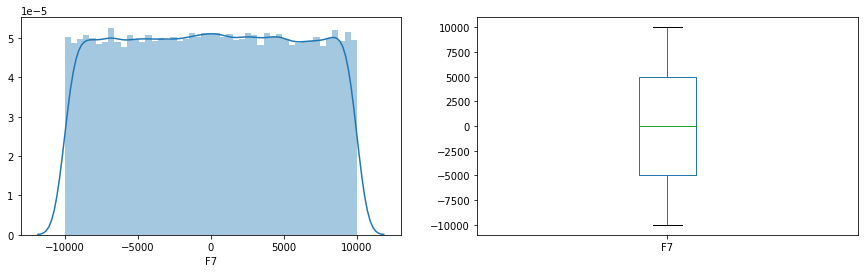

In [601]:
# distplot gives the histogram
plt.figure(1)
plt.subplot(121)
sns.distplot(train['F7']);
plt.subplot(122)
train['F7'].plot.box(figsize=(15,4)) 
plt.show()

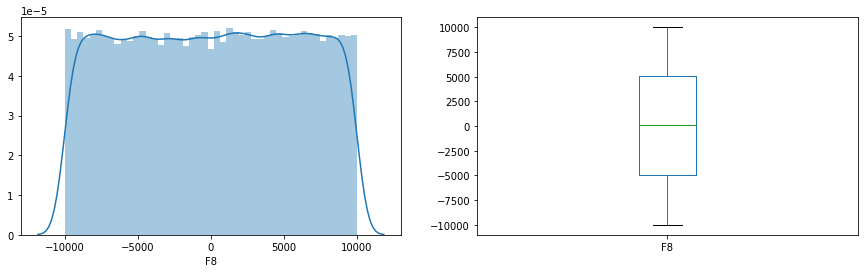

In [602]:
# distplot gives the histogram
plt.figure(1)
plt.subplot(121)
sns.distplot(train['F8']);
plt.subplot(122)
train['F8'].plot.box(figsize=(15,4)) 
plt.show()

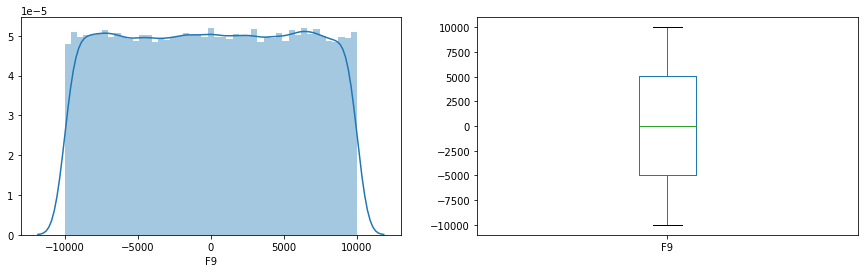

In [603]:
# distplot gives the histogram
plt.figure(1)
plt.subplot(121)
sns.distplot(train['F9']);
plt.subplot(122)
train['F9'].plot.box(figsize=(15,4)) 
plt.show()

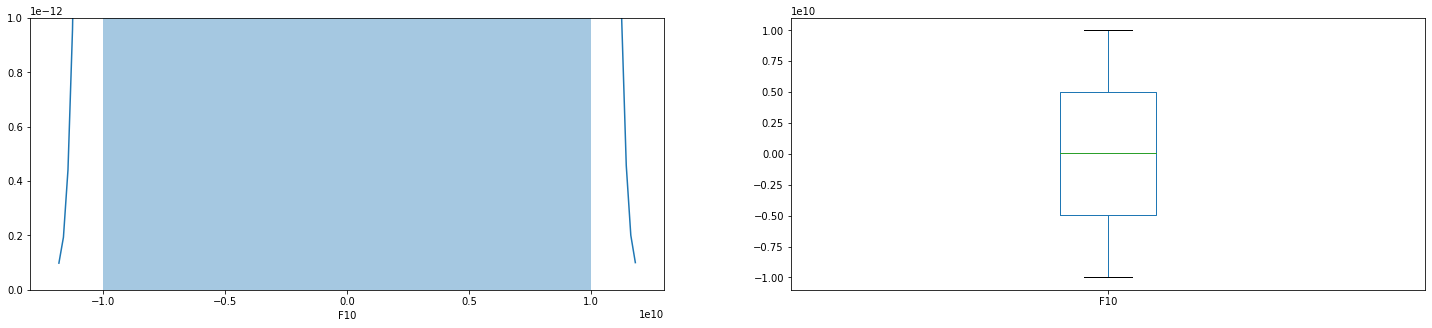

In [604]:
# distplot gives the histogram
plt.figure(1)
plt.subplot(121)
sns.distplot(train['F10']);
plt.subplot(122)
train['F10'].plot.box(figsize=(25,5)) 
plt.show()

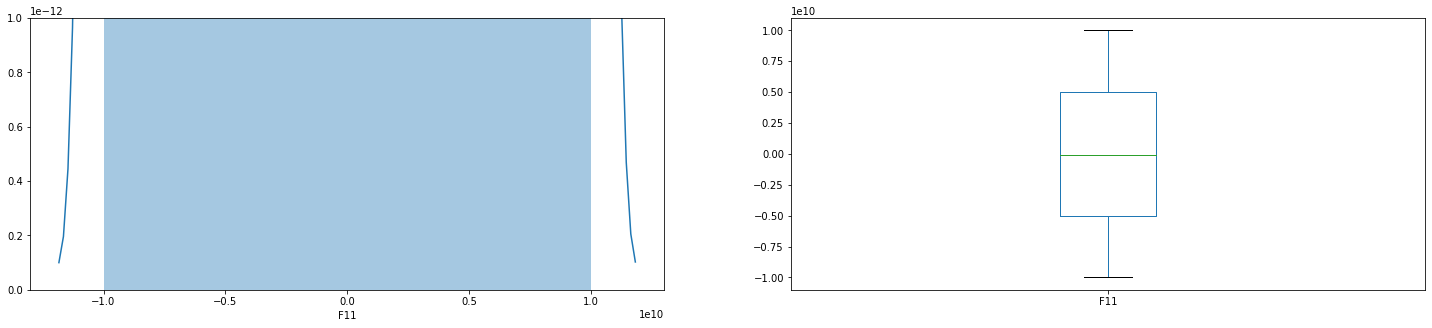

In [605]:
# distplot gives the histogram
plt.figure(1)
plt.subplot(121)
sns.distplot(train['F11']);
plt.subplot(122)
train['F11'].plot.box(figsize=(25,5)) 
plt.show()

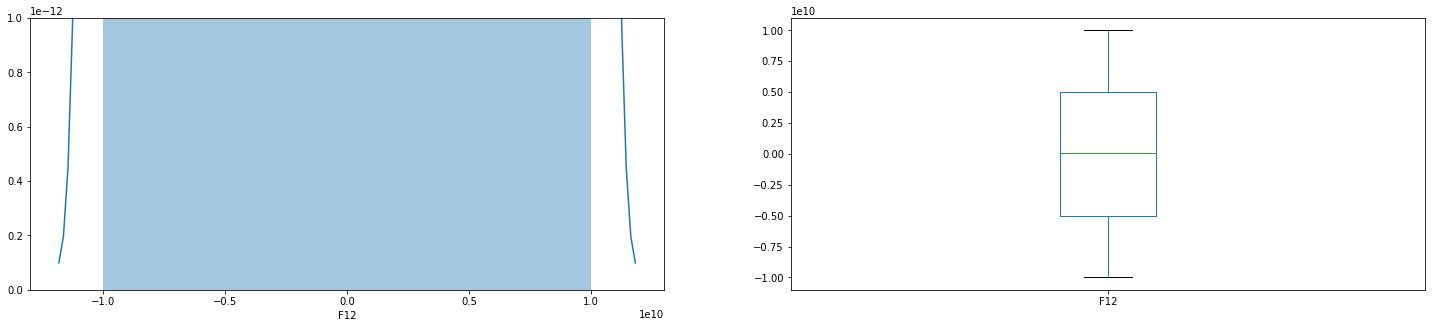

In [606]:
# distplot gives the histogram
plt.figure(1)
plt.subplot(121)
sns.distplot(train['F12']);
plt.subplot(122)
train['F12'].plot.box(figsize=(25,5)) 
plt.show()

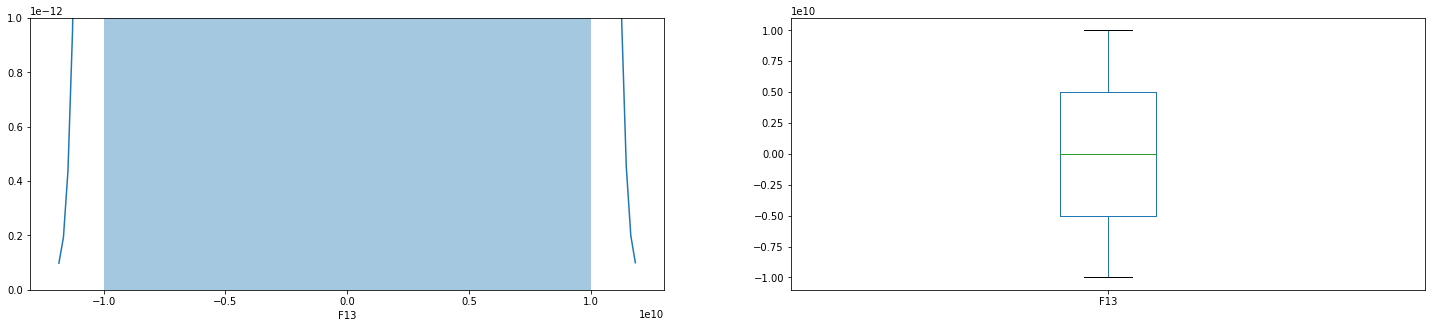

In [607]:
# distplot gives the histogram
plt.figure(1)
plt.subplot(121)
sns.distplot(train['F13']);
plt.subplot(122)
train['F13'].plot.box(figsize=(25,5)) 
plt.show()

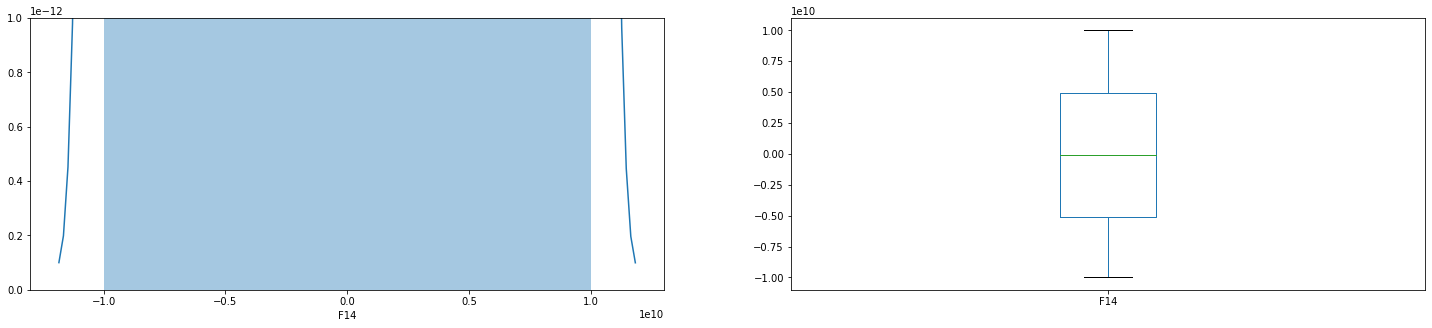

In [608]:
# distplot gives the histogram
plt.figure(1)
plt.subplot(121)
sns.distplot(train['F14']);
plt.subplot(122)
train['F14'].plot.box(figsize=(25,5)) 
plt.show()

1    80.371615
2    13.378138
3     2.397707
6     2.114054
4     1.738486
Name: F17, dtype: float64


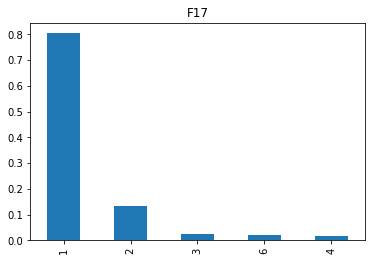

In [609]:
print(train['F17'].value_counts(normalize=True)*100)   # percentage wise
train['F17'].value_counts(normalize=True).plot.bar(title = "F17")

- F17 is int64 dtype but it behaves as a categorical variable. It can be a Ordinal Categorical variable where number represents some order or higher degree of preference.

1    80.482309
2    13.326744
3     2.407590
6     2.005337
4     1.778019
Name: F18, dtype: float64


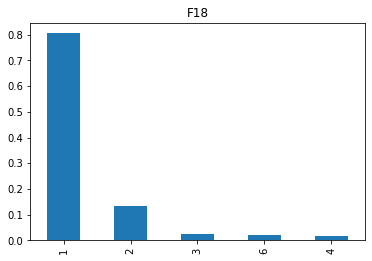

In [610]:
print(train['F18'].value_counts(normalize=True)*100)   # percentage wise
train['F18'].value_counts(normalize=True).plot.bar(title = "F18")

- F18 also is an int64 dtype but it behaves as a categorical variable. It can be a Ordinal Categorical variable where number represents some order or higher degree of preference.

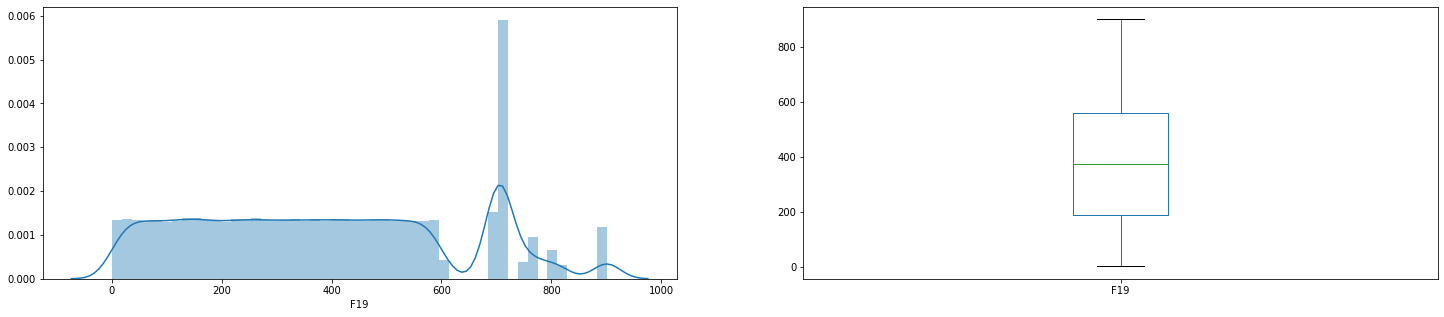

In [611]:
# distplot gives the histogram
plt.figure(1)
plt.subplot(121)
sns.distplot(train['F19']);
plt.subplot(122)
train['F19'].plot.box(figsize=(25,5)) 
plt.show()

In [612]:
train['F19'].nunique()

646

901    2.114054
702    1.394544
705    1.356988
701    1.354023
708    1.353034
         ...   
754    0.106740
768    0.105752
814    0.104764
454    0.103775
805    0.097845
Name: F19, Length: 646, dtype: float64


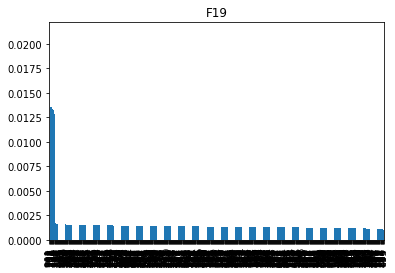

In [613]:
print(train['F19'].value_counts(normalize=True)*100)   # percentage wise
train['F19'].value_counts(normalize=True).plot.bar(title = "F19")

In [614]:
train['F20'].nunique()

646

901    2.005337
705    1.411346
702    1.362918
709    1.353034
704    1.338209
         ...   
801    0.103775
65     0.101799
765    0.100810
323    0.097845
289    0.097845
Name: F20, Length: 646, dtype: float64


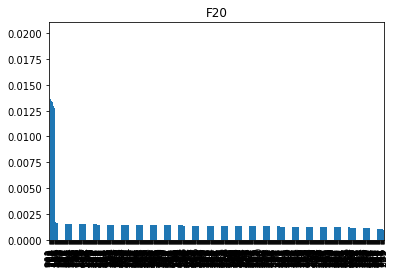

In [615]:
print(train['F20'].value_counts(normalize=True)*100)   # percentage wise
train['F20'].value_counts(normalize=True).plot.bar(title = "F20")

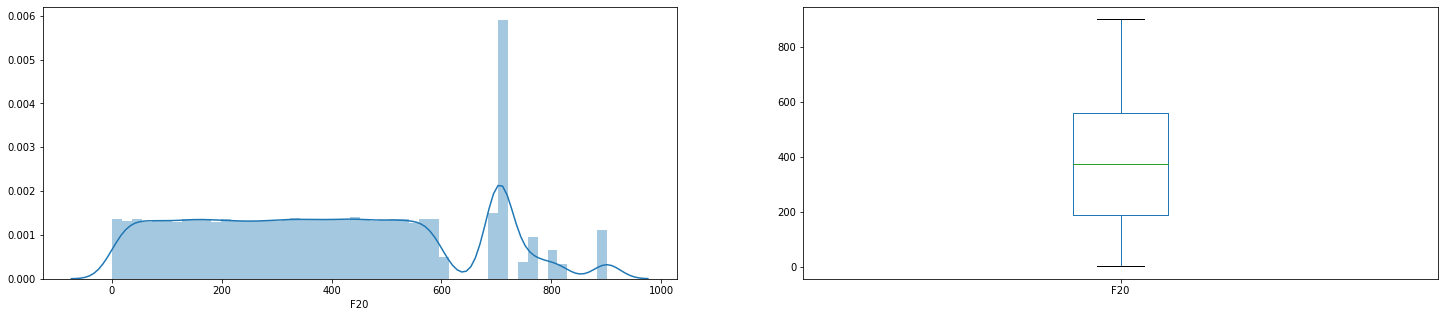

In [616]:
# distplot gives the histogram
plt.figure(1)
plt.subplot(121)
sns.distplot(train['F20']);
plt.subplot(122)
train['F20'].plot.box(figsize=(25,5)) 
plt.show()

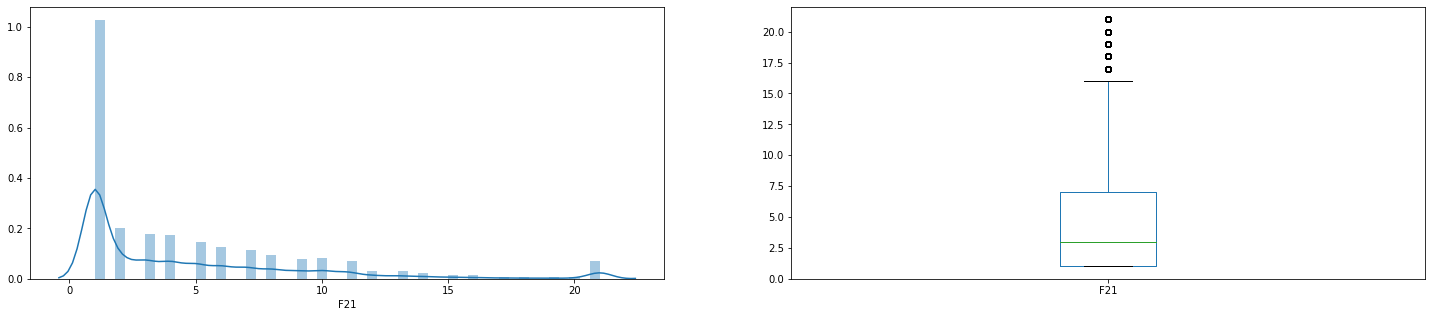

In [617]:
# distplot gives the histogram
plt.figure(1)
plt.subplot(121)
sns.distplot(train['F21']);
plt.subplot(122)
train['F21'].plot.box(figsize=(25,5)) 
plt.show()

1     41.080253
2      8.061870
3      7.144693
4      6.940107
5      5.843052
6      5.078079
7      4.494959
8      3.777426
10     3.222969
9      3.163669
11     2.801937
21     2.774264
12     1.270014
13     1.209725
14     0.899387
15     0.642419
16     0.531726
17     0.315280
18     0.262898
19     0.246096
20     0.239178
Name: F21, dtype: float64


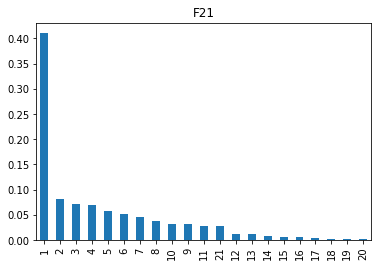

In [618]:
print(train['F21'].value_counts(normalize=True)*100)   # percentage wise
train['F21'].value_counts(normalize=True).plot.bar(title = "F21")

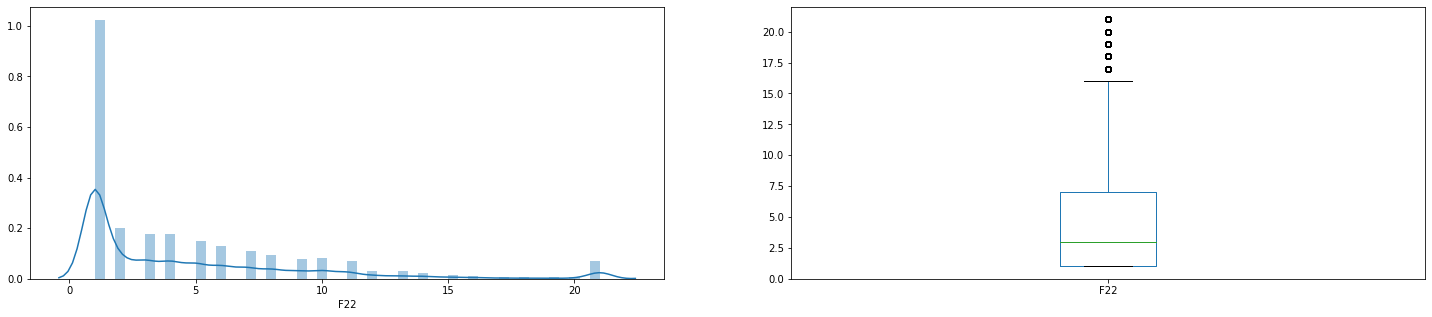

In [619]:
# distplot gives the histogram
plt.figure(1)
plt.subplot(121)
sns.distplot(train['F22']);
plt.subplot(122)
train['F22'].plot.box(figsize=(25,5)) 
plt.show()

1     40.925084
2      7.954141
3      7.114054
4      7.020162
5      5.998221
6      5.184819
7      4.466298
8      3.773473
10     3.234829
9      3.130065
21     2.838506
11     2.769322
12     1.303617
13     1.170192
14     0.992291
15     0.629571
16     0.519866
17     0.274758
18     0.258944
20     0.223364
19     0.218423
Name: F22, dtype: float64


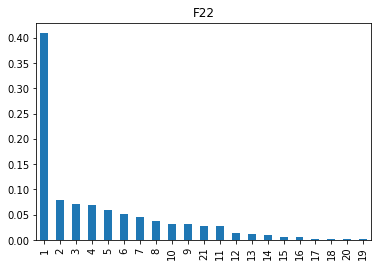

In [620]:
print(train['F22'].value_counts(normalize=True)*100)   # percentage wise
train['F22'].value_counts(normalize=True).plot.bar(title = "F22")

There are `21` unique categories.

- F17, F18, F19, F20, F21, F22 all behave differently. 
- They can be aggregated Demographic Continuous values or some Nominal Ordinal Categorical Variables.

- We can see that number of Unique categories in F20 and F19 are same.

**BIVARIATE ANALYSIS**

Making a Stacked Column Chart for Target Variables and other categorically behaving features to look for any relation or pattern between them.

<Figure size 720x720 with 0 Axes>

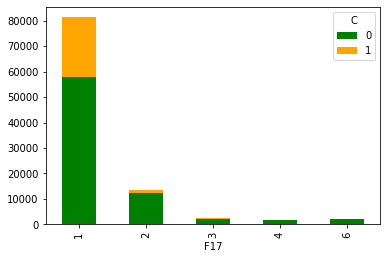

In [621]:
plt.figure(figsize=(10,10))
df = pd.crosstab(train['F17'],train['C'])
df.plot(kind='bar', stacked= True ,color =['green','orange'],grid=False)

- There are `5` unique categories.
- `F17` - `1` category has major proportion of buying the product.

<Figure size 720x720 with 0 Axes>

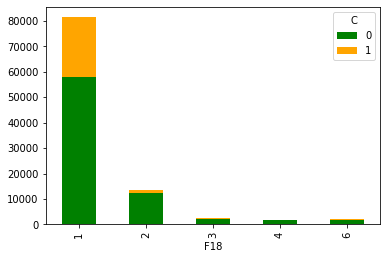

In [622]:
plt.figure(figsize=(10,10))
df = pd.crosstab(train['F18'],train['C'])
df.plot(kind='bar', stacked= True ,color =['green','orange'],grid=False)

- There are `5` unique categories.
- `F18` - `1` category has major proportion of buying the product.

<Figure size 720x720 with 0 Axes>

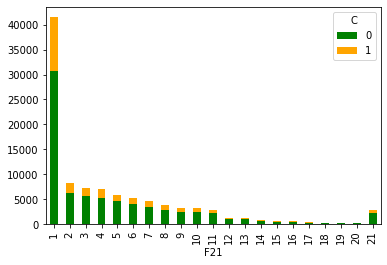

In [623]:
plt.figure(figsize=(10,10))
df = pd.crosstab(train['F21'],train['C'])
df.plot(kind='bar', stacked= True ,color =['green','orange'],grid=False)

- There are `21` unique categories.
- `F21` - `1` category has major proportion of buying the product.

<Figure size 720x720 with 0 Axes>

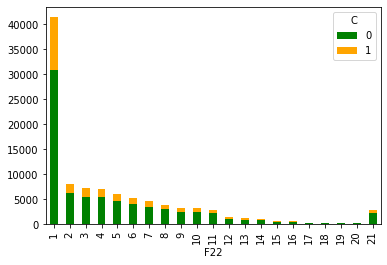

In [624]:
plt.figure(figsize=(10,10))
df = pd.crosstab(train['F22'],train['C'])
df.plot(kind='bar', stacked= True ,color =['green','orange'],grid=False)

- There are `21` unique categories.
- `F22` - `1` category has major proportion of buying the product.

- `Finding Correlation between Continuous Variables`

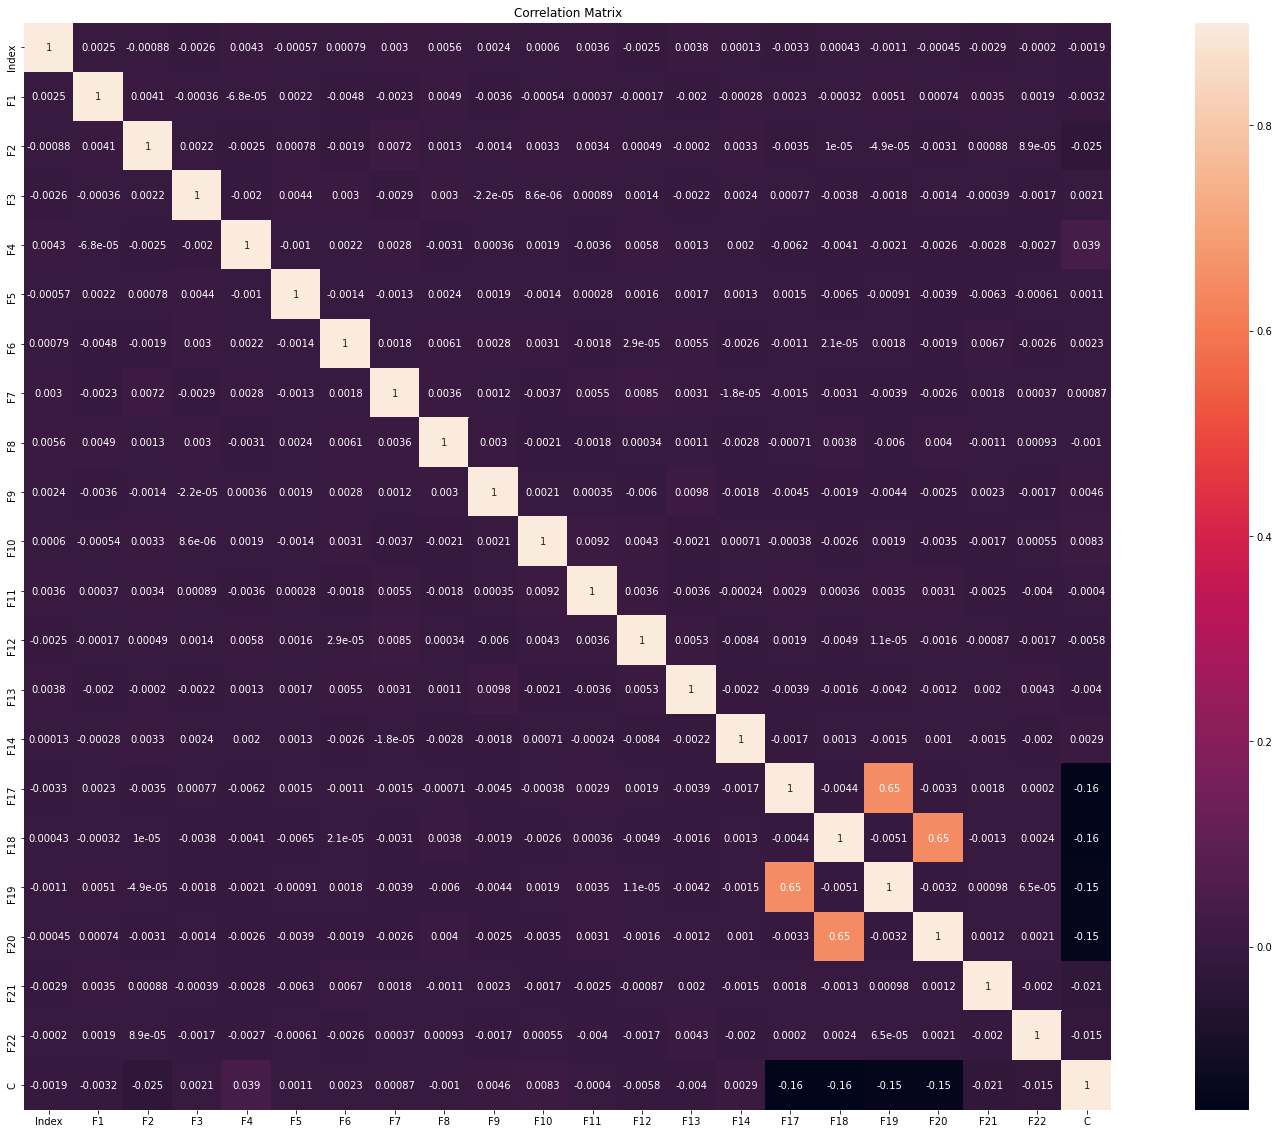

In [625]:
corrmat = train.corr()
plt.subplots(figsize=(30, 20))
plt.title('Correlation Matrix')
sns.heatmap(corrmat, vmax=.9, annot = True ,square=True)

**`F18` and `F20`, `F17` and `F19` are correlated features.**

- Checking Duplicate Variables

In [626]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF_train = train[train.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF_train)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [Index, F1, F2, F3, F4, F5, F6, F7, F8, F9, F10, F11, F12, F13, F14, F15, F16, F17, F18, F19, F20, F21, F22, C]
Index: []


In [627]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF_test = test[test.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF_test)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [Index, F1, F2, F3, F4, F5, F6, F7, F8, F9, F10, F11, F12, F13, F14, F15, F16, F17, F18, F19, F20, F21, F22]
Index: []


**Checking Missing Vlues**

In [628]:
# checking missing data percentage in data
def misssing_values(df):
  total = df.isnull().sum().sort_values(ascending = False)
  percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
  missing_Data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

  return missing_Data

In [629]:
data_missing = misssing_values(train)
print("Missing values in train Data\n\n\n", data_missing)
test_missing = misssing_values(test)
print("Missing values in test Data\n\n\n", test_missing)

Missing values in train Data


        Total  Percent
C          0      0.0
F22        0      0.0
F1         0      0.0
F2         0      0.0
F3         0      0.0
F4         0      0.0
F5         0      0.0
F6         0      0.0
F7         0      0.0
F8         0      0.0
F9         0      0.0
F10        0      0.0
F11        0      0.0
F12        0      0.0
F13        0      0.0
F14        0      0.0
F15        0      0.0
F16        0      0.0
F17        0      0.0
F18        0      0.0
F19        0      0.0
F20        0      0.0
F21        0      0.0
Index      0      0.0
Missing values in test Data


        Total  Percent
F22        0      0.0
F10        0      0.0
F1         0      0.0
F2         0      0.0
F3         0      0.0
F4         0      0.0
F5         0      0.0
F6         0      0.0
F7         0      0.0
F8         0      0.0
F9         0      0.0
F11        0      0.0
F21        0      0.0
F12        0      0.0
F13        0      0.0
F14        0      0.0
F15        0 

- There are no missing values in the dataset.


- Converting into datetime

**FEATURE ENGINEERING**

In [630]:
def feature_engineering(df):

  df['date_1']=pd.to_datetime(df['F15'])
  df['date_2']=pd.to_datetime(df['F16'])
  df['Gaps_Duration_by_days']=(df['date_2']-df['date_1'])/np.timedelta64(1,'D')
  df['Gaps_Duration_by_month']=(df['date_2']-df['date_1'])/np.timedelta64(1,'M')
  df['Gaps_Duration_by_week']=(df['date_2']-df['date_1'])/np.timedelta64(1,'W')
  
  return df

In [631]:
train = feature_engineering(train)
test = feature_engineering(test)

In [632]:
train.head()

,Index,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,C,date_1,date_2,Gaps_Duration_by_days,Gaps_Duration_by_month,Gaps_Duration_by_week
0,1,0.224506,0.500340,0.489860,0.902413,7934,-6970,-5714,9982,-5697,4227810299,-3918676258,316195953,6176861823,-3433637453,10/4/1986,9/6/1992,2,1,706,305,1,2,0,1986-10-04,1992-09-06,2164.0,71.097969,309.142857
1,2,0.321128,0.281119,0.907283,0.772159,-8238,1219,1663,1287,-3658,-1146724819,-6837090439,1378635942,-9031507610,609277486,2/24/1979,1/5/1983,1,1,423,206,18,7,1,1979-02-24,1983-01-05,1411.0,46.358241,201.571429
2,3,0.893441,0.622005,0.998776,0.098386,8540,5266,-9377,-3504,-4511,5947184989,6881163164,-9921889287,-5610051842,-8977995005,1/12/1989,11/22/1986,2,1,703,315,1,4,0,1989-01-12,1986-11-22,-782.0,-25.692519,-111.714286
3,4,0.320641,0.957234,0.346000,0.646479,-7772,-383,9681,-8661,3474,-5724795826,-6014104498,6550322883,-4697085930,4868760308,2/18/1982,6/10/1992,1,1,122,304,15,1,0,1982-02-18,1992-06-10,3765.0,123.698639,537.857143
4,5,0.475961,0.623008,0.544988,0.159709,1571,-8039,-7961,-2385,4407,-3097637172,-9755731483,759031103,9984692447,9757408267,4/10/1987,10/19/1985,1,1,486,240,1,1,0,1987-04-10,1985-10-19,-538.0,-17.675928,-76.857143


In [633]:
test.head()

,Index,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,date_1,date_2,Gaps_Duration_by_days,Gaps_Duration_by_month,Gaps_Duration_by_week
0,T30234341,0.654765,0.812009,0.603190,0.391039,-5220,4825,-1784,7447,-7147,-3461806391,8178108368,-8674321652,8074343777,5553595074,9/17/1996,8/18/1990,1,1,436,478,1,1,1996-09-17,1990-08-18,-2222.0,-73.003552,-317.428571
1,T30234342,0.694636,0.690568,0.473460,0.259760,-618,-5018,2012,9259,9267,-36253473,-6531193961,1849753082,-5556861821,2216284070,11/7/1985,4/11/1990,1,1,138,56,10,4,1985-11-07,1990-04-11,1616.0,53.093493,230.857143
2,T30234343,0.203759,0.323301,0.492294,0.011448,-8778,6141,6965,3774,4303,5354243488,8053401796,782597920,-2121815725,-315409510,7/9/1984,5/4/1997,1,1,117,323,10,1,1984-07-09,1997-05-04,4682.0,153.826567,668.857143
3,T30234344,0.319627,0.286247,0.906197,0.093840,-7929,4471,7715,9543,335,7405036171,-2666864618,-8649240595,1389754605,-3360224957,6/3/1987,7/1/1988,1,1,115,149,16,21,1987-06-03,1988-07-01,394.0,12.944824,56.285714
4,T30234345,0.236003,0.782784,0.285689,0.383585,-3296,4564,-1580,-8559,-27,-6351599280,-2152422738,4768902493,3653338555,7604838279,7/17/1984,12/3/1993,1,1,527,281,3,1,1984-07-17,1993-12-03,3426.0,112.560833,489.428571


In [634]:
train.dtypes

Index                              int64
F1                               float64
F2                               float64
F3                               float64
F4                               float64
F5                                 int64
F6                                 int64
F7                                 int64
F8                                 int64
F9                                 int64
F10                                int64
F11                                int64
F12                                int64
F13                                int64
F14                                int64
F15                               object
F16                               object
F17                                int64
F18                                int64
F19                                int64
F20                                int64
F21                                int64
F22                                int64
C                                  int64
date_1          

In [635]:
test.dtypes

Index                             object
F1                               float64
F2                               float64
F3                               float64
F4                               float64
F5                                 int64
F6                                 int64
F7                                 int64
F8                                 int64
F9                                 int64
F10                                int64
F11                                int64
F12                                int64
F13                                int64
F14                                int64
F15                               object
F16                               object
F17                                int64
F18                                int64
F19                                int64
F20                                int64
F21                                int64
F22                                int64
date_1                    datetime64[ns]
date_2          

In [636]:
# dropping. variables
train = train.drop(["date_1","date_2", "F15", "F16"],axis=1)
test = test.drop(["date_1","date_2", "F15", "F16"],axis=1)

In [637]:
train = train.drop("Index",axis=1)
test = test.drop("Index",axis=1)

In [638]:
X=train.drop("C",1)

In [639]:
y=train[["C"]]

In [640]:
len(X), len(y)

(101180, 101180)

In [641]:
X.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F17,F18,F19,F20,F21,F22,Gaps_Duration_by_days,Gaps_Duration_by_month,Gaps_Duration_by_week
0,0.224506,0.500340,0.489860,0.902413,7934,-6970,-5714,9982,-5697,4227810299,-3918676258,316195953,6176861823,-3433637453,2,1,706,305,1,2,2164.0,71.097969,309.142857
1,0.321128,0.281119,0.907283,0.772159,-8238,1219,1663,1287,-3658,-1146724819,-6837090439,1378635942,-9031507610,609277486,1,1,423,206,18,7,1411.0,46.358241,201.571429
2,0.893441,0.622005,0.998776,0.098386,8540,5266,-9377,-3504,-4511,5947184989,6881163164,-9921889287,-5610051842,-8977995005,2,1,703,315,1,4,-782.0,-25.692519,-111.714286
3,0.320641,0.957234,0.346000,0.646479,-7772,-383,9681,-8661,3474,-5724795826,-6014104498,6550322883,-4697085930,4868760308,1,1,122,304,15,1,3765.0,123.698639,537.857143
4,0.475961,0.623008,0.544988,0.159709,1571,-8039,-7961,-2385,4407,-3097637172,-9755731483,759031103,9984692447,9757408267,1,1,486,240,1,1,-538.0,-17.675928,-76.857143


In [642]:
y.head()

,C
0,0
1,1
2,0
3,0
4,0


**FEATURE SCALING**

- Since the dataset shows high variability of scale so, it is important to scale the data to avoid domination of variables over another.

In [643]:
from sklearn import preprocessing
import seaborn as sns

In [644]:
# create list of column names to use later
col_names = list(X.columns)

In [645]:
def scaling(df, col_names):
  s_scaler = preprocessing.StandardScaler()
  df_s = s_scaler.fit_transform(df)

  df_s = pd.DataFrame(df_s, columns=col_names)

  fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
  ax1.set_title('After StandardScaler')

  sns.kdeplot(df_s['F1'], ax=ax1)
  sns.kdeplot(df_s['F2'], ax=ax1)
  sns.kdeplot(df_s['F3'], ax=ax1)
  sns.kdeplot(df_s['F4'], ax=ax1)
  sns.kdeplot(df_s['F5'], ax=ax1)
  sns.kdeplot(df_s['F6'], ax=ax1)

  sns.kdeplot(df_s['F7'], ax=ax1)
  sns.kdeplot(df_s['F8'], ax=ax1)
  sns.kdeplot(df_s['F9'], ax=ax1)
  sns.kdeplot(df_s['F10'], ax=ax1)
  sns.kdeplot(df_s['F11'], ax=ax1)
  sns.kdeplot(df_s['F12'], ax=ax1)
  sns.kdeplot(df_s['F13'], ax=ax1)
  sns.kdeplot(df_s['F14'], ax=ax1)
  sns.kdeplot(df_s['F17'], ax=ax1)
  sns.kdeplot(df_s['F18'], ax=ax1)
  sns.kdeplot(df_s['F19'], ax=ax1)
  sns.kdeplot(df_s['F20'], ax=ax1)
  sns.kdeplot(df_s['F21'], ax=ax1)
  sns.kdeplot(df_s['F22'], ax=ax1);

  return df_s

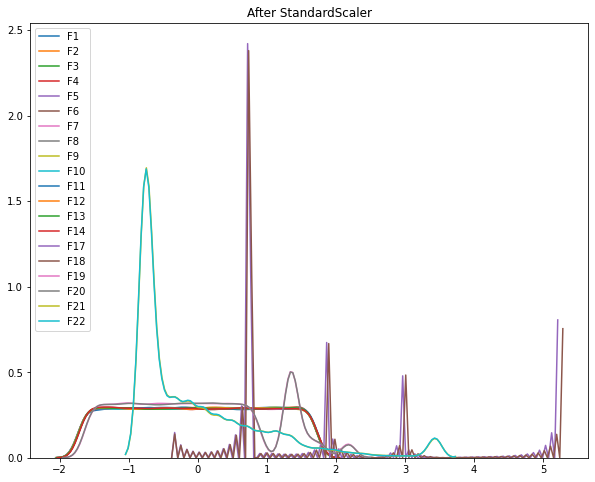

In [646]:
# scaling train data
X = scaling(X, col_names)

In [647]:
X.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F17,F18,F19,F20,F21,F22,Gaps_Duration_by_days,Gaps_Duration_by_month,Gaps_Duration_by_week
0,-0.964539,-0.004003,-0.034707,1.394303,1.377381,-1.202697,-0.992435,1.723318,-0.988902,0.729604,-0.676859,0.053584,1.065488,-0.584826,0.738661,-0.379663,1.351279,-0.349802,-0.751318,-0.544035,0.585227,0.585227,0.585227
1,-0.629111,-0.762513,1.410295,0.943172,-1.419671,0.210036,0.287060,0.219716,-0.635582,-0.202013,-1.181855,0.237661,-1.562703,0.114359,-0.379832,-0.379663,0.151813,-0.770411,2.808408,0.502763,0.173764,0.173764,0.173764
2,1.357696,0.416963,1.727018,-1.390420,1.482193,0.908208,-1.627760,-0.608779,-0.783390,1.027639,1.191922,-1.720251,-0.971434,-1.543671,0.738661,-0.379663,1.338563,-0.307316,-0.751318,-0.125316,-1.024558,-1.024558,-1.024558
3,-0.630802,1.576862,-0.532711,0.507883,-1.339074,-0.066334,1.677733,-1.500565,0.600258,-0.995573,-1.039447,1.133700,-0.813662,0.850997,-0.379832,-0.379663,-1.123944,-0.354051,2.180221,-0.753395,1.460062,1.460062,1.460062
4,-0.091602,0.420434,0.156131,-1.178031,0.276859,-1.387116,-1.382164,-0.415274,0.761929,-0.540183,-1.686891,0.130309,1.723528,1.696443,-0.379832,-0.379663,0.418832,-0.625959,-0.751318,-0.753395,-0.891229,-0.891229,-0.891229


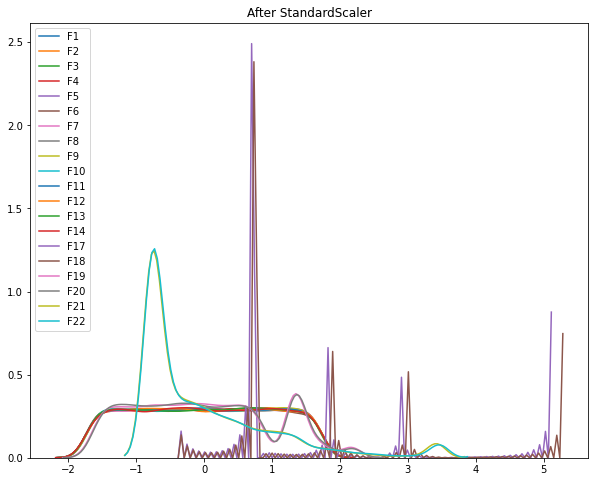

In [648]:
# scaling test data
test = scaling(test, col_names)

In [649]:
test.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F17,F18,F19,F20,F21,F22,Gaps_Duration_by_days,Gaps_Duration_by_month,Gaps_Duration_by_week
0,0.539153,1.079408,0.359881,-0.375007,-0.905854,0.851489,-0.309601,1.284632,-1.249198,-0.594249,1.413769,-1.494270,1.404174,0.969668,-0.380563,-0.380024,0.199006,0.391464,-0.760686,-0.752957,-1.830690,-1.830690,-1.830690
1,0.678045,0.658070,-0.088766,-0.830730,-0.109535,-0.860123,0.348304,1.597699,1.595693,-0.001701,-1.136531,0.328493,-0.963339,0.386782,-0.380563,-0.380024,-1.063058,-1.396597,1.122035,-0.120074,0.281628,0.281628,0.281628
2,-1.031920,-0.616151,-0.023632,-1.692719,-1.521522,1.080330,1.206734,0.650033,0.735327,0.930741,1.392147,0.143662,-0.366729,-0.055397,-0.380563,-0.380024,-1.151995,-0.265288,1.122035,-0.752957,1.969061,1.969061,1.969061
3,-0.628296,-0.744710,1.407779,-1.406701,-1.374613,0.789931,1.336720,1.646767,0.047590,1.285485,-0.466533,-1.489926,0.243172,-0.587196,-0.380563,-0.380024,-1.160465,-1.002545,2.377183,3.466265,-0.390923,-0.390923,-0.390923
4,-0.919598,0.978010,-0.738141,-0.400884,-0.572930,0.806103,-0.274244,-1.480792,-0.015152,-1.094122,-0.377339,0.834088,0.636319,1.327933,-0.380563,-0.380024,0.584401,-0.443247,-0.342303,-0.752957,1.277797,1.277797,1.277797


- **Splitting the Dataset into Training and Test set**


In [650]:
from sklearn.model_selection import train_test_split

# LightGBM
import lightgbm as lgb

# sklearn tools for model training and assesment
from sklearn.model_selection import train_test_split
from sklearn.metrics import (roc_curve, auc, accuracy_score)
from sklearn.model_selection import GridSearchCV

In [651]:
# Take a hold out set randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an LGBM dataset for training
train_data = lgbm.Dataset(data=X_train, label=y_train, free_raw_data=False)

# Create an LGBM dataset from the test
test_data = lgbm.Dataset(data=X_test, label=y_test, free_raw_data=False)

# Finally, create a dataset for the FULL training data to give us maximum amount of data to train on after 
# performance has been calibrate
final_train_set = lgbm.Dataset(data=X, label=y, free_raw_data=False)

Defining hyperparameters

In [652]:
# params = {'boosting_type': 'gbdt',
#           'max_depth' : -1,
#           'objective': 'binary',
#           'nthread': 3, # Updated from nthread
#           'num_leaves': 64,
#           'learning_rate': 0.05,
#           'max_bin': 512,
#           'subsample_for_bin': 200,
#           'subsample': 1,
#           'subsample_freq': 1,
#           'colsample_bytree': 0.8,
#           'reg_alpha': 5,
#           'reg_lambda': 10,
#           'min_split_gain': 0.5,
#           'min_child_weight': 1,
#           'min_child_samples': 5,
#           'is_unbalance': True,
#           'metric' : 'auc'}

# # Create parameters to search
# gridParams = {
#     'learning_rate': [0.005],
#     'n_estimators': [40],
#     'num_leaves': [6,8,12,16],
#     'boosting_type' : ['gbdt'],
#     'objective' : ['binary'],
#     'random_state' : [501], # Updated from 'seed'
#     'colsample_bytree' : [0.65, 0.66],
#     'subsample' : [0.7,0.75],
#     'reg_alpha' : [1,1.2],
#     'reg_lambda' : [1,1.2,1.4],
#     }


In [653]:
# # Create classifier to use. Note that parameters have to be input manually
# # not as a dict!
# mdl = lgb.LGBMClassifier(boosting_type= 'gbdt',
#           objective = 'binary',
#           n_jobs = 3, # Updated from 'nthread'
#           silent = True,
#           max_depth = params['max_depth'],
#           max_bin = params['max_bin'],
#           subsample_for_bin = params['subsample_for_bin'],
#           subsample = params['subsample'],
#           subsample_freq = params['subsample_freq'],
#           min_split_gain = params['min_split_gain'],
#           min_child_weight = params['min_child_weight'],
#           min_child_samples = params['min_child_samples'])
# # To view the default model params:
# mdl.get_params().keys()

# # Create the grid
# grid = GridSearchCV(mdl, gridParams,
#                     verbose=0,
#                     cv=4,
#                     n_jobs=2)
# # Run the grid
# grid.fit(X,y)

# # Print the best parameters found
# print(grid.best_params_)
# print(grid.best_score_)

In [654]:
lgbm_params = {
    'boosting': 'dart',          # dart (drop out trees) often performs better
    'application': 'binary',     # Binary classification
    'learning_rate': 0.05,       # Learning rate, controls size of a gradient descent step
    'min_data_in_leaf': 20,      # Data set is quite small so reduce this a bit
    'feature_fraction': 0.7,     # Proportion of features in each boost, controls overfitting
    'num_leaves': 41,  
    'random_state':42,          # Controls size of tree since LGBM uses leaf wise splits
    'metric': 'binary_logloss',  # Area under ROC curve as the evaulation metric
    'drop_rate': 0.15,
    'is_unbalance': True
              }

Training Model

In [655]:
evaluation_results = {}
clf = lgbm.train(train_set=train_data,
                 params=lgbm_params,
                 valid_sets=[train_data, test_data], 
                 valid_names=['Train', 'Test'],
                 evals_result=evaluation_results,
                 num_boost_round=500,
                 early_stopping_rounds=100,
                 verbose_eval=20
                )
optimum_boost_rounds = clf.best_iteration

[20]	Train's binary_logloss: 0.526291	Test's binary_logloss: 0.528999
[40]	Train's binary_logloss: 0.579366	Test's binary_logloss: 0.581249
[60]	Train's binary_logloss: 0.587579	Test's binary_logloss: 0.589713
[80]	Train's binary_logloss: 0.591777	Test's binary_logloss: 0.594296
[100]	Train's binary_logloss: 0.597167	Test's binary_logloss: 0.60018
[120]	Train's binary_logloss: 0.593648	Test's binary_logloss: 0.596845
[140]	Train's binary_logloss: 0.59396	Test's binary_logloss: 0.597294
[160]	Train's binary_logloss: 0.594867	Test's binary_logloss: 0.598584
[180]	Train's binary_logloss: 0.591241	Test's binary_logloss: 0.595875
[200]	Train's binary_logloss: 0.593309	Test's binary_logloss: 0.598004
[220]	Train's binary_logloss: 0.592374	Test's binary_logloss: 0.597628
[240]	Train's binary_logloss: 0.587478	Test's binary_logloss: 0.593791
[260]	Train's binary_logloss: 0.584969	Test's binary_logloss: 0.591989
[280]	Train's binary_logloss: 0.583832	Test's binary_logloss: 0.591696
[300]	Train'

Visualise Training Performance

In [656]:
# plotting Training Performance and feture importance

def plot_performance(evaluation_results_train, evaluation_results_test, clf):
  
  fig, axs = plt.subplots(1, 2, figsize=[45, 10])
  # Plot the log loss during training
  axs[0].plot(evaluation_results_train, label='Train')
  axs[0].plot(evaluation_results_test, label='Test')
  axs[0].set_ylabel('Log loss')
  axs[0].set_xlabel('Boosting round')
  axs[0].set_title('Training performance')
  axs[0].legend()
  
  # Plot feature importance
  importances = pd.DataFrame({'features': clf.feature_name(),
                              'importance': clf.feature_importance()}).sort_values('importance', ascending=False)
                              
  axs[1].bar(x=np.arange(len(importances)), height=importances['importance'])
  axs[1].set_xticks(np.arange(len(importances)))
  axs[1].set_xticklabels(importances['features'])
  axs[1].set_ylabel('Feature importance (# times used to split)')
  axs[1].set_title('Feature importance')
  plt.show()

  return

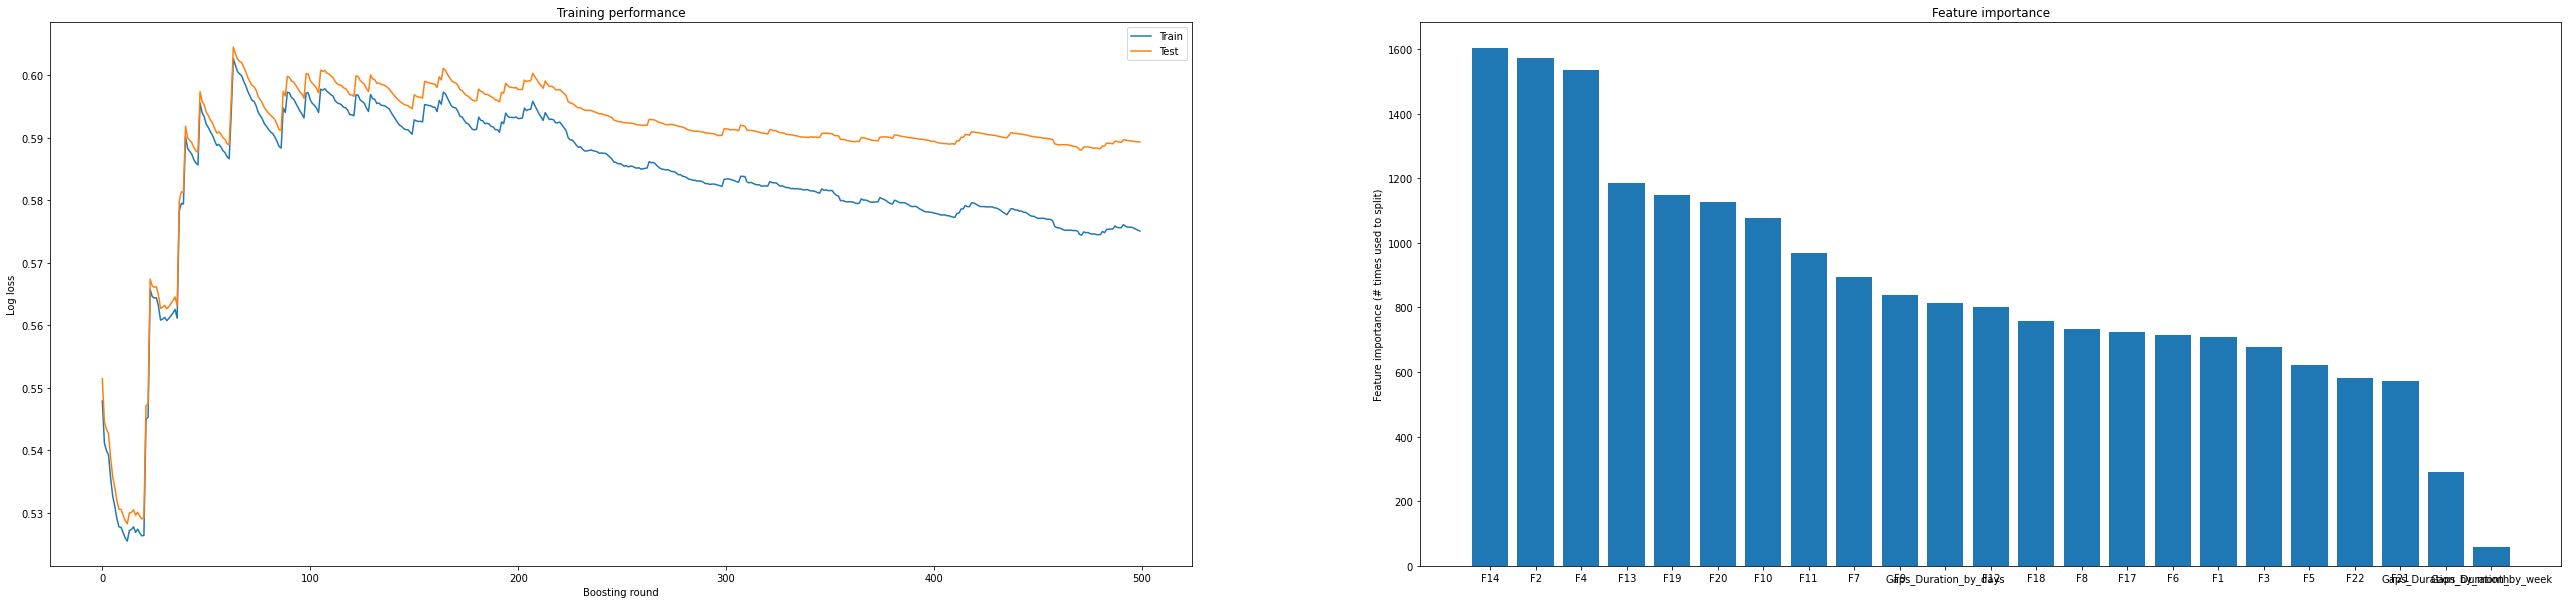

In [657]:
plot_performance(evaluation_results['Train']['binary_logloss'], evaluation_results['Test']['binary_logloss'], clf)

**`Accuracy Metrics & Reports`**

In [658]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_curve, auc

In [659]:
preds = np.round(clf.predict(X_test))

In [660]:
# from sklearn.model_selection import cross_val_score
# accuracies = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 10)
# print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
# print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [661]:
# plots confusion matrix, classification report, and ROC Curve.
def pulish_acuracy_reports(clf, X_test, preds, y_test):
  
  # preds = np.round(clf.predict(X_test))
  print("CLASSIFICATION REPORT \n\n\n\n")
  print('Accuracy score = \t {}'.format(accuracy_score(y_test, preds)))
  print('Precision score = \t {}'.format(precision_score(y_test, preds)))
  print('Recall score =   \t {}'.format(recall_score(y_test, preds)))
  print('F1 score =      \t {}'.format(f1_score(y_test, preds)))

  print("CONFUSION MATRIX \n\n\n\n")
  cm = confusion_matrix(y_test, preds)
  plt.matshow(cm)
  plt.title('Confusion Matrix Plot\n\n')
  plt.colorbar()
  plt.xlabel('Precited')
  plt.ylabel('Actual')
  plt.show()

  false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, preds)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  print("ROC Area Under Curve is :\n\n\n\n", roc_auc)

  plt.figure(figsize=(10,10))
  plt.title('Receiver Operating Characteristic')
  plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],linestyle='--')
  plt.axis('tight')
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')

  return

CLASSIFICATION REPORT 




Accuracy score = 	 0.560090927060684
Precision score = 	 0.3532879818594104
Recall score =   	 0.9310756972111554
F1 score =      	 0.5122191780821918
CONFUSION MATRIX 






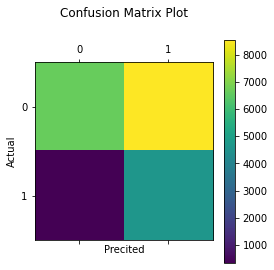

ROC Area Under Curve is :



 0.6843864290472181


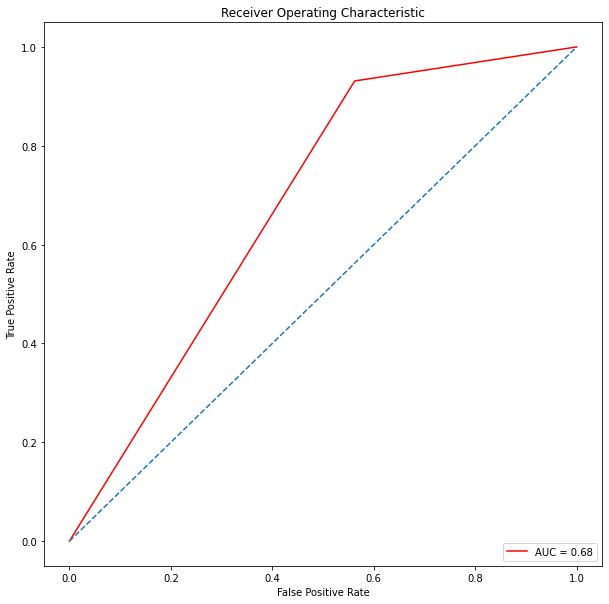

In [662]:
pulish_acuracy_reports(clf, X_test, preds, y_test)

- AUC score is 0.69

**PREDICTION ON TEST DATASET**

In [663]:
ans = np.round(clf.predict(test))

In [664]:
ans = pd.DataFrame(ans)

In [665]:
ans.head()

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [666]:
id1=test_copy.loc[:,['Index']]
final_ans = [id1, ans]
final_ans = pd.concat(final_ans, axis=1)
final_ans.columns = ['Complaint-ID', 'C']
final_ans.head()

,Complaint-ID,C
0,T30234341,1.0
1,T30234342,1.0
2,T30234343,1.0
3,T30234344,1.0
4,T30234345,1.0


In [667]:
final_ans.to_csv('Dataset_test_Predictions.csv',index=False)

**Saving Test Prediction on the Trained Model**

**FURTHER SCOPE OF IMPROVEMENT**
- Given the features are highly variable in terms of scale, so we might use different models for low scale features, and high scaled features differently and in the last can combine them making use of Ensemble Averaging approach.

- Tuning of Algorithms can be donw to further improve the score.
- Use of Grid Search CV can be used.
- Cross Validation Technique can be used for robust fit of model.
  - PS: I could not use it given the Time Constraint.
- More Ensembling methods like Catboost, XGBM can be used.
- I HAVE DISPLAYED PyCaret libraries use in a different script which clearly shows that further tuning will give better results